# EDA

In [117]:
import pandas as pd
import numpy as np
import datetime


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [118]:
df = pd.read_csv('/Users/markdetiberiis/Desktop/Patient_no_show/cleaned_data.csv')

In [119]:
df

,Unnamed: 0,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,SMSReceived,NoShow,schedule_date,schedule_time,schedule_weekday,appointment_date,appointment_time,appointment_weekday,Waiting_Time_days,waiting_days
0,0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,0,No,2016-04-29,18:38:08,Friday,2016-04-29,00:00:00,Friday,0,0 days 00:00:00.000000000
1,1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,0,No,2016-04-29,16:08:27,Friday,2016-04-29,00:00:00,Friday,0,0 days 00:00:00.000000000
2,2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,0,No,2016-04-29,16:19:04,Friday,2016-04-29,00:00:00,Friday,0,0 days 00:00:00.000000000
3,3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,0,No,2016-04-29,17:29:31,Friday,2016-04-29,00:00:00,Friday,0,0 days 00:00:00.000000000
4,4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,0,No,2016-04-29,16:07:23,Friday,2016-04-29,00:00:00,Friday,0,0 days 00:00:00.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,110522,2.572134e+12,5651768,F,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,...,1,No,2016-05-03,09:15:35,Tuesday,2016-06-07,00:00:00,Tuesday,35,35 days 00:00:00.000000000
110523,110523,3.596266e+12,5650093,F,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,...,1,No,2016-05-03,07:27:33,Tuesday,2016-06-07,00:00:00,Tuesday,35,35 days 00:00:00.000000000
110524,110524,1.557663e+13,5630692,F,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,...,1,No,2016-04-27,16:03:52,Wednesday,2016-06-07,00:00:00,Tuesday,41,41 days 00:00:00.000000000
110525,110525,9.213493e+13,5630323,F,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,...,1,No,2016-04-27,15:09:23,Wednesday,2016-06-07,00:00:00,Tuesday,41,41 days 00:00:00.000000000


In [172]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)

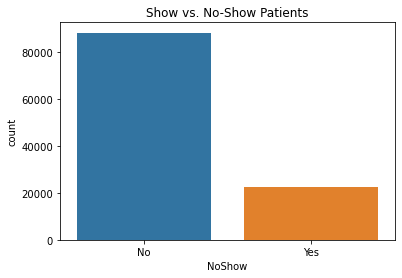

In [120]:
#Show vs. NoShow

ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title("Show vs. NoShow Patients")
plt.show()

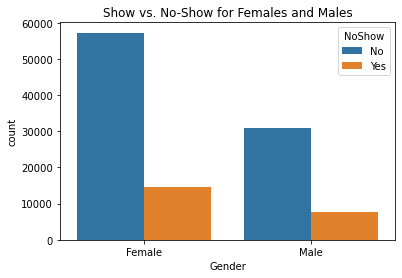

In [121]:
#NoShow by gender 

ax = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
ax.set_title("Show vs. No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

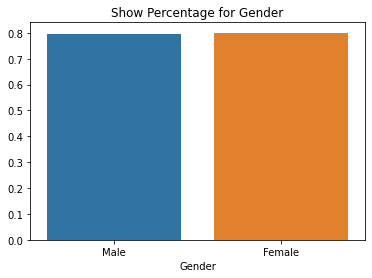

In [191]:
#NoShow by gender & df_s_ratio = df[df.NoShow == 'No'].groupby(['Gender']).size()/df.groupby(['Gender']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio)
ax.set_title("Show Percentage for Gender")
x_ticks_labels=['Male', 'Female']
ax.set_xticklabels(x_ticks_labels)
plt.show()

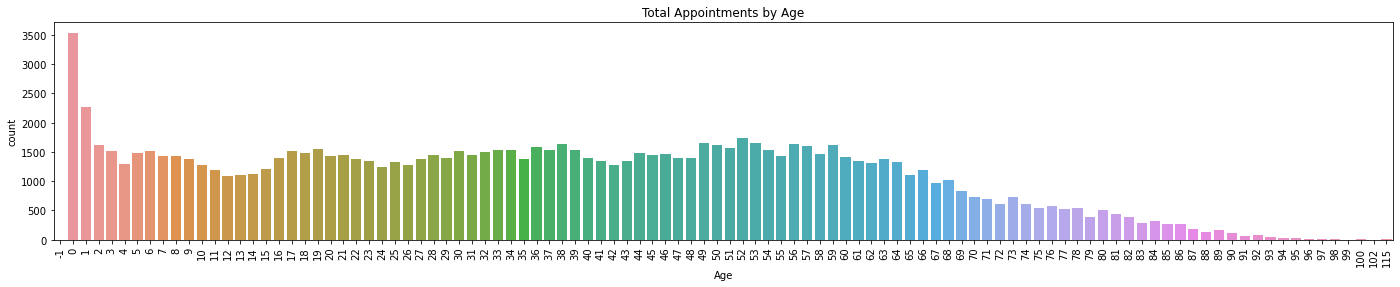

In [199]:
#number of appointments by age 

plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Total Appointments by Age")
plt.show()

In [124]:
#who shows up % by age

df_age_ratio = df[df.NoShow == 'No'].groupby(['Age']).size()/df.groupby(['Age']).size()

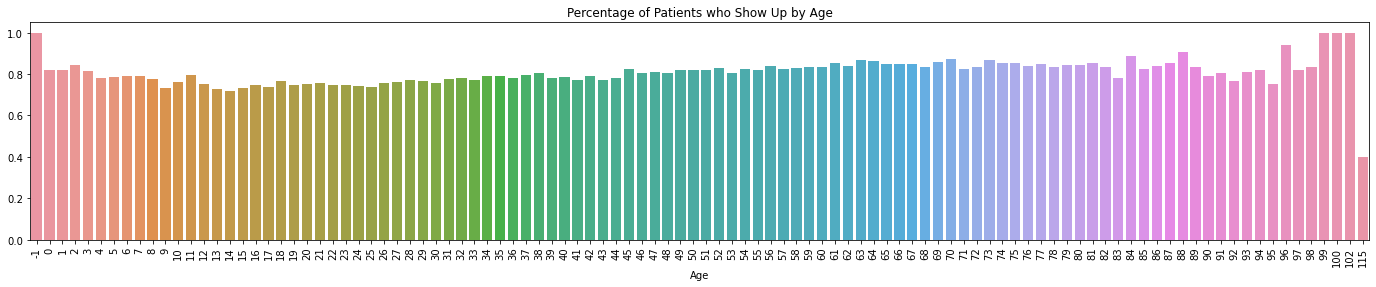

In [196]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
ax.set_title("Percentage of Patients who Show Up by Age")
plt.show()

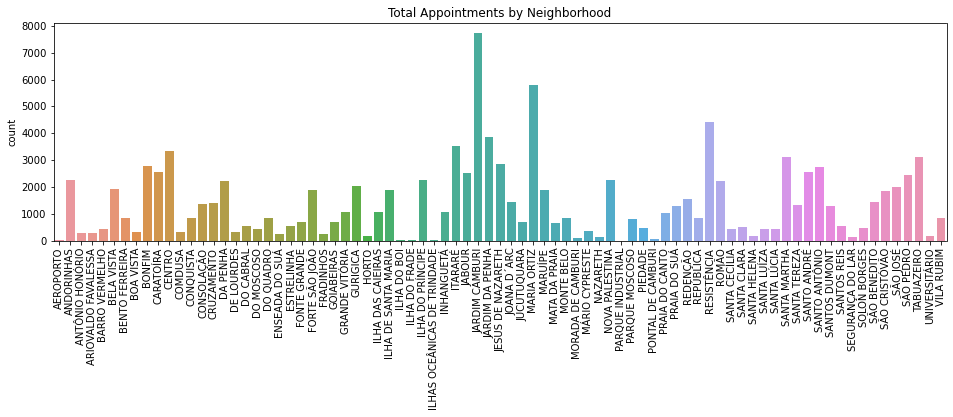

In [200]:
#appointments by neighborhood

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("Total Appointments by Neighborhood")
plt.show()

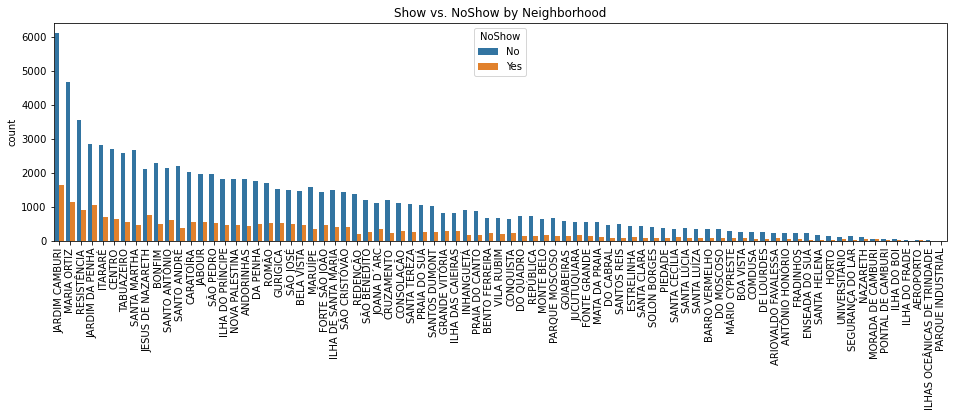

In [201]:
#show v noshow by neighborhood

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood), hue=df.NoShow, order=df.Neighbourhood.value_counts().index)
ax.set_title("Show vs. NoShow by Neighborhood")
plt.show()

In [128]:
#who shows up % by neighborhood

df_neighborhood_ratio = df[df.NoShow == 'No'].groupby(['Neighbourhood']).size()/df.groupby(['Neighbourhood']).size()

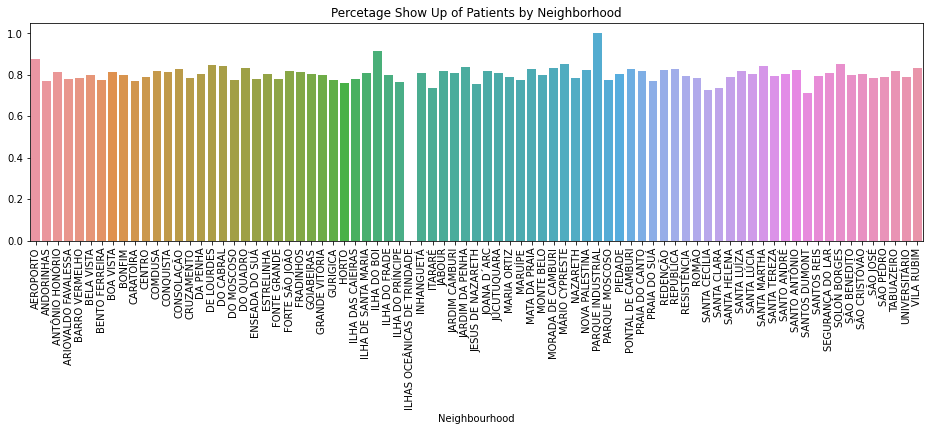

In [197]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_neighborhood_ratio.index, y=df_neighborhood_ratio)
ax.set_title("Percetage Show Up of Patients by Neighborhood")
plt.show()

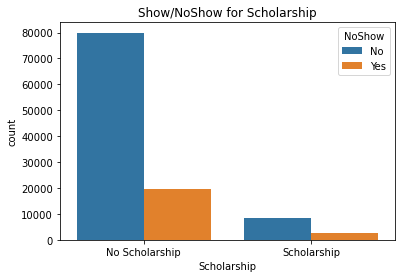

In [130]:
#scholarwship vs. no scholarship 

ax = sns.countplot(x=df.Scholarship, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

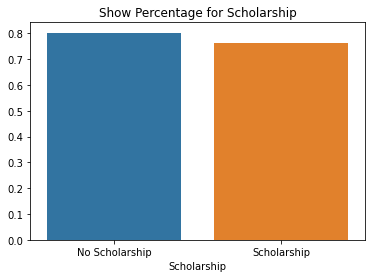

In [162]:
#scholarwship vs. no scholarship %

df_s_ratio = df[df.NoShow == 'No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio)
ax.set_title("Show Percentage for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

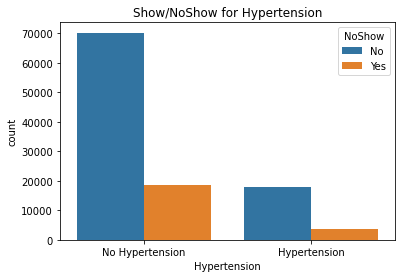

In [132]:
#hypertension vs. no hypertension

ax = sns.countplot(x=df.Hypertension, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

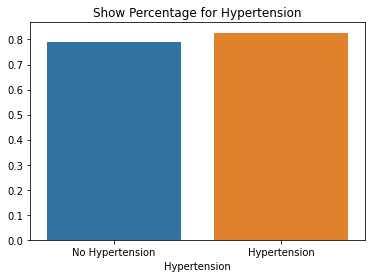

In [163]:
#hypertension vs. no hypertension %

df_h_ratio = df[df.NoShow == 'No'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()
ax = sns.barplot(x=df_h_ratio.index, y=df_h_ratio)
ax.set_title("Show Percentage for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

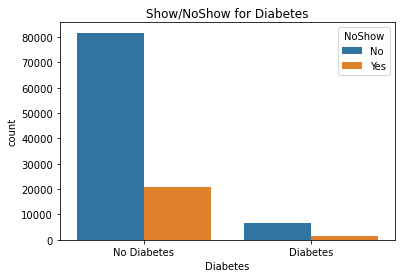

In [134]:
#diabetes vs. no diabetes 

ax = sns.countplot(x=df.Diabetes, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

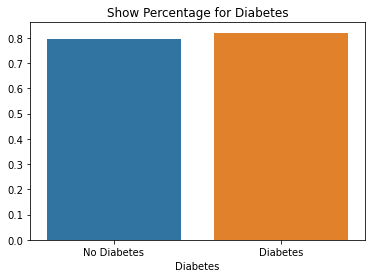

In [164]:
#diabetes vs. no diabetes %

df_d_ratio = df[df.NoShow == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
ax = sns.barplot(x=df_d_ratio.index, y=df_d_ratio)
ax.set_title("Show Percentage for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

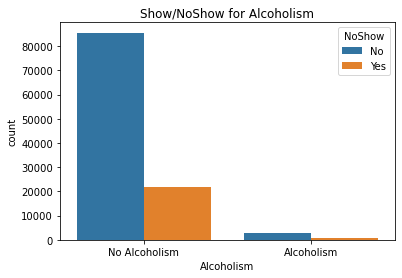

In [136]:
#alcoholism vs. no alcoholism

ax = sns.countplot(x=df.Alcoholism, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()


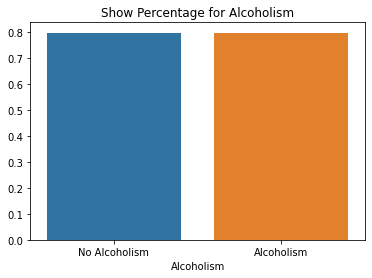

In [165]:
#alcoholism vs. no alcoholism %

df_a_ratio = df[df.NoShow == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()
ax = sns.barplot(x=df_a_ratio.index, y=df_a_ratio)
ax.set_title("Show Percentage for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()


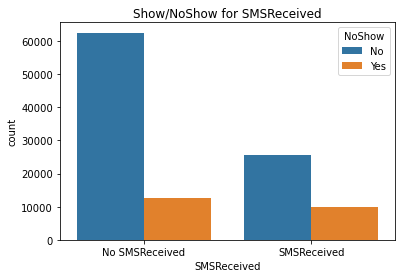

In [140]:
#SMSReceived vs. no received

ax = sns.countplot(x=df.SMSReceived, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

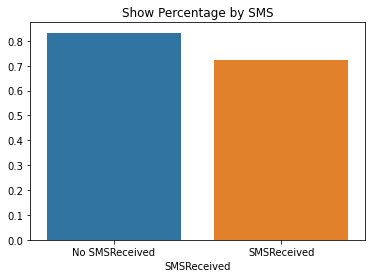

In [167]:
#SMSReceived vs. no received %

df_s_ratio = df[df.NoShow == 'No'].groupby(['SMSReceived']).size()/df.groupby(['SMSReceived']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio)
ax.set_title("Show Percentage by SMS")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()


Seems like more people who do not receive an SMS show up for their appointments that those who do receive an SMS message.
This could be an automated SMS when they made the appointment so it would have little effect on patients remembering their appointment.

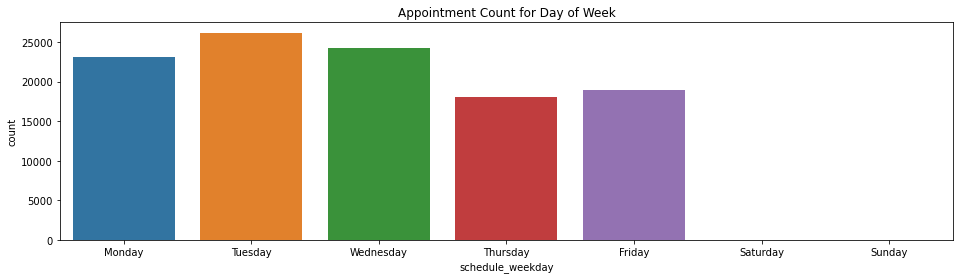

In [213]:
#appointments by DOW

week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.schedule_weekday, order=week_key)
ax.set_title("Appointment Count for Day of Week")
plt.show()


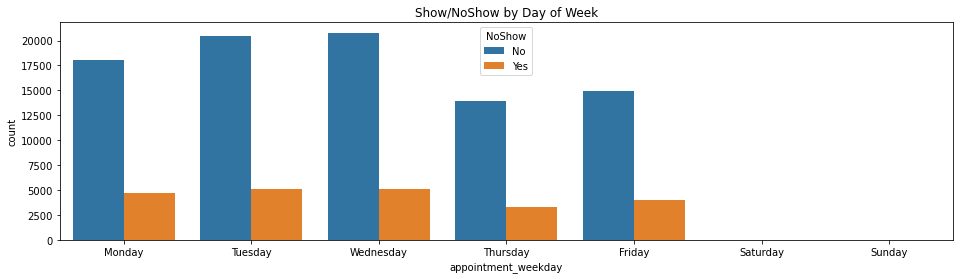

In [212]:
#NoShow by DOW

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.appointment_weekday, hue=df.NoShow, order=week_key)
ax.set_title("Show/NoShow by Day of Week")
plt.show()

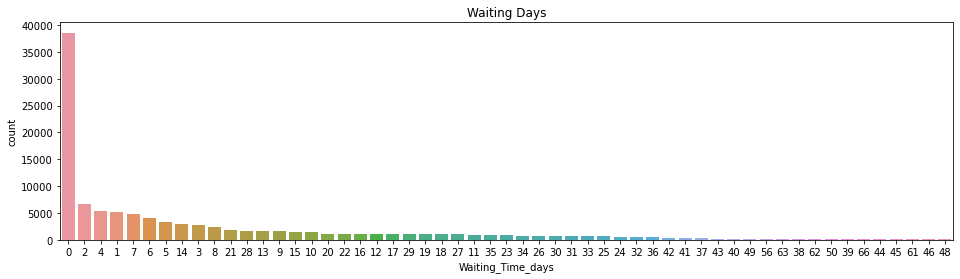

In [210]:
#Waiting days 

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts().iloc[:55].index)
ax.set_title("Waiting Days")
plt.show()

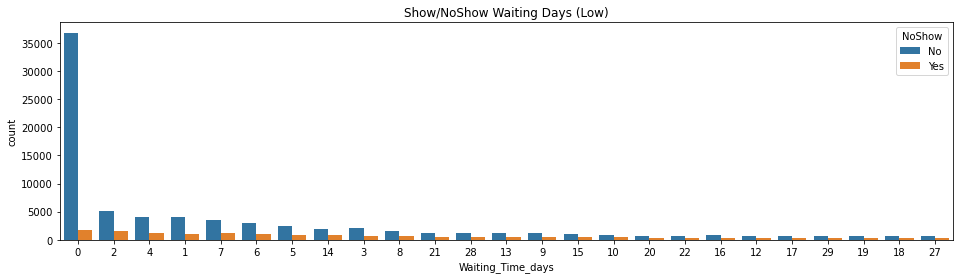

In [207]:
#NoShow by waiting days 

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, hue=df.NoShow, order=df.Waiting_Time_days.value_counts().iloc[:25].index)
ax.set_title("Show/NoShow Waiting Days (Low)")
plt.show()

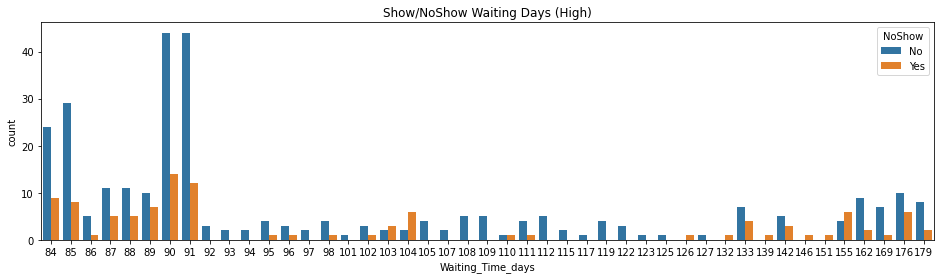

In [208]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df[['Waiting_Time_days']].sort_values('Waiting_Time_days', ascending=False).Waiting_Time_days.iloc[:400], hue=df.NoShow)
ax.set_title("Show/NoShow Waiting Days (High)")
plt.show()

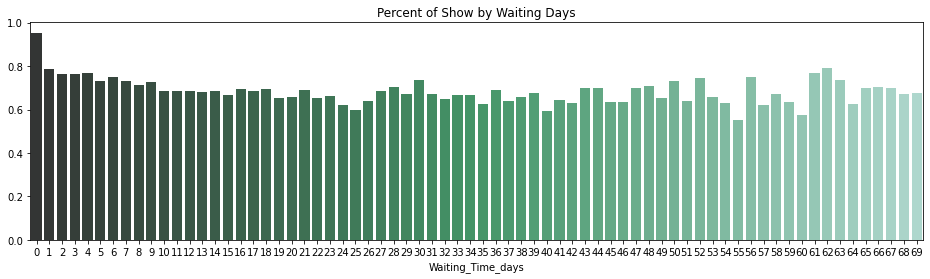

In [209]:
#NoShow by waiting days %

df_w_ratio = df[df.NoShow == 'No'].groupby(['Waiting_Time_days']).size()/df.groupby(['Waiting_Time_days']).size()

plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio, order=df.Waiting_Time_days.iloc[:70].index, palette="BuGn_d")
ax.set_title("Percent of Show by Waiting Days")
plt.show()